![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [76]:
# Start your code here!
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date

men_df=pd.read_csv('men_results.csv',parse_dates=['date'])
women_df=pd.read_csv('women_results.csv',parse_dates=['date'])

print(men_df.head())
print(women_df.head())

# Checking data types
print(men_df.dtypes)
print(women_df.dtypes)

# size of data
print("################################################")
print("Men's datasize: ",len(men_df))
print("Women's datasize: ",len(women_df))

print("################################################")
#Aggregating home and away scores for men and women
men_df['goal_scored']=(men_df['home_score']+men_df['away_score'])
print(men_df.head())
women_df['goal_scored']=(women_df['home_score']+women_df['away_score'])
print(women_df.head())


print("###########---Null values in men and women data-----########")
# Null values in men and women data
print(men_df.isna().sum())
print(women_df.isna().sum())


print("###########---Filtering data after 2002-----########")
men_df=men_df[men_df['date']>'2002-01-01']
women_df=women_df[women_df['date']>'2002-01-01']

print(men_df.head(3))
print(women_df.head(3))

print("###########---Tournaments-----########")
print(men_df['tournament'].unique())
print(women_df['tournament'].unique())


print("###########---Filter out FIFA Tournaments-----########")
men_df=men_df[men_df['tournament']=='FIFA World Cup']
women_df=women_df[women_df['tournament']=='FIFA World Cup']

print(men_df.head(2))
print(women_df.head(2))


print("###########---Size of Dataset-----########")

print(len(men_df))
print(len(women_df))

print("###########---Sample, bootstrap distribution, population means-----########")
s_men_df=men_df.sample(n=100)
s_men_df.reset_index(drop=True, inplace=True)
s_women_df=women_df.sample(n=100)
s_women_df.reset_index(drop=True, inplace=True)


print("Sample mean - Mens : ",np.mean(s_men_df['goal_scored']))
print("Sample mean - Womens : ",np.mean(s_women_df['goal_scored']))



print("True population mean - Mens : ",np.mean(men_df['goal_scored']))
print("True population mean - Womens : ",np.mean(women_df['goal_scored']))

print("True population std dev - Mens : ",men_df['goal_scored'].std(ddof=0))

print("True population std dev - Womens : ",women_df['goal_scored'].std(ddof=0))

   Unnamed: 0       date home_team away_team  home_score  away_score tournament
0           0 1872-11-30  Scotland   England           0           0   Friendly
1           1 1873-03-08   England  Scotland           4           2   Friendly
2           2 1874-03-07  Scotland   England           2           1   Friendly
3           3 1875-03-06   England  Scotland           2           2   Friendly
4           4 1876-03-04  Scotland   England           3           0   Friendly
   Unnamed: 0       date home_team  ... home_score  away_score        tournament
0           0 1969-11-01     Italy  ...          1           0              Euro
1           1 1969-11-01   Denmark  ...          4           3              Euro
2           2 1969-11-02   England  ...          2           0              Euro
3           3 1969-11-02     Italy  ...          3           1              Euro
4           4 1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]
Unnamed: 0  

<AxesSubplot: >

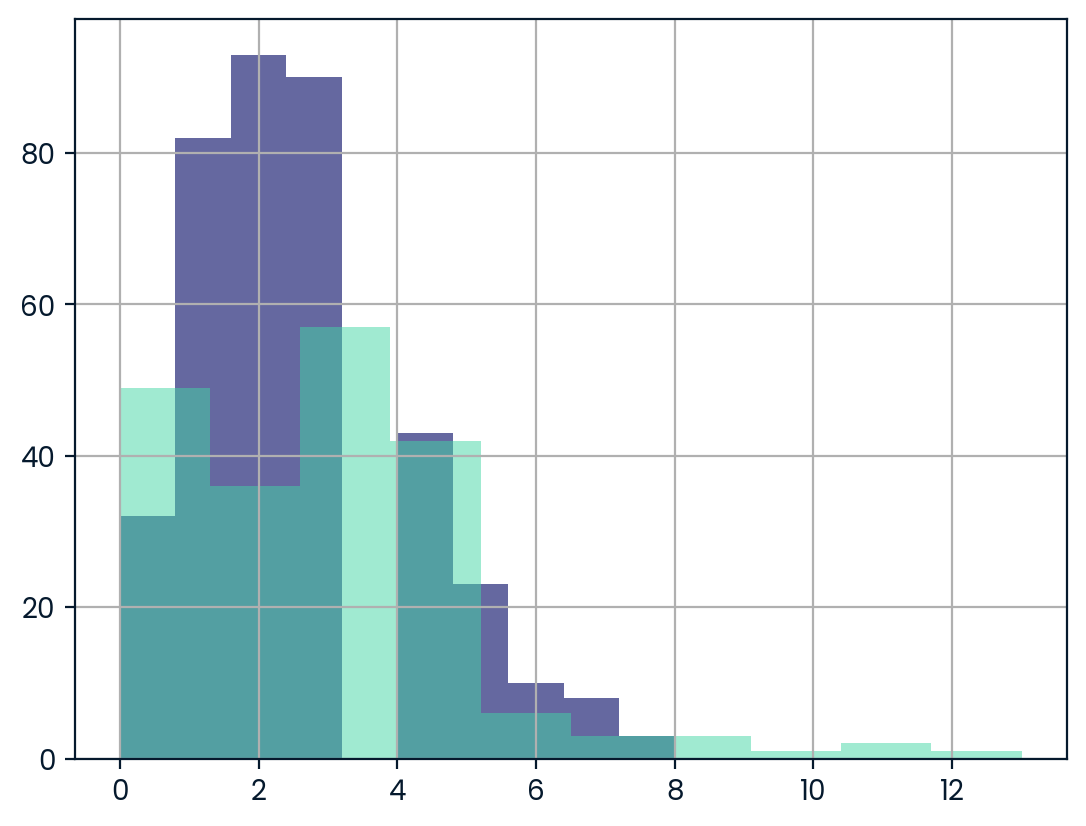

In [77]:

men_df['goal_scored'].hist()
women_df['goal_scored'].hist(alpha=0.5)


In [78]:
print("#########################-----Hypothesis testing---------#########################")
#Unpaired test because independent groups
df_fifa=pd.DataFrame()
men_df['gender']='men'
women_df['gender']='women'
df_fifa=pd.concat([men_df,women_df])
df_fifa.reset_index(drop=True,inplace=True)
df_fifa=df_fifa[['goal_scored','gender']]
print(df_fifa)

gender_vs_score=df_fifa.pivot(columns='gender',values='goal_scored')
print(gender_vs_score)

import pingouin as pg
alpha=0.10
test_res=pg.mwu(x=gender_vs_score['women'],
      y=gender_vs_score['men'],
      alternative='greater')

p_val = test_res['p-val'].values[0]
result_dict=dict()
result_dict={"p_val":p_val,"result":"reject"}


print(result_dict)




#########################-----Hypothesis testing---------#########################
     goal_scored gender
0              1    men
1              8    men
2              2    men
3              3    men
4              1    men
..           ...    ...
579            3  women
580            3  women
581            1  women
582            3  women
583            2  women

[584 rows x 2 columns]
gender  men  women
0       1.0    NaN
1       8.0    NaN
2       2.0    NaN
3       3.0    NaN
4       1.0    NaN
..      ...    ...
579     NaN    3.0
580     NaN    3.0
581     NaN    1.0
582     NaN    3.0
583     NaN    2.0

[584 rows x 2 columns]
{'p_val': 0.005106609825443641, 'result': 'reject'}
